# End-to-End (Very Simple) Data Science Pipeline Example

Based on the tutorial <a href="Machine learning in the real world">"Machine learning in the real world" </a> (VLDB,2016)

## 0.1 Import Python Libraries

In [107]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

## 0.2 Reading the Income Classification Dataset

In [108]:
train_data = pd.read_csv('data/adults_train.csv')
test_data = pd.read_csv('data/adults_test.csv')

## 1. Exploration (EDA) & Visualization

In [3]:
train_data.head()

,age,workclass,observation-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset Sizes:

In [149]:
train_data.shape

(32561, 15)

In [4]:
len(train_data),len(test_data)

(32561, 16281)

### Columns & Data types

In [5]:
train_data.dtypes

age                    int64
workclass             object
observation-weight     int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
class                 object
dtype: object

We divide the column names to binary, categorical, and numeric

In [6]:
binary_variables = ['class']
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']

### Class distribution

In [7]:
train_data['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

### Data Statistics

In [8]:
train_data.describe()

,age,observation-weight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Value Histograms

Simple histogram using Pandas

In [156]:
train_data["age"].max()

90

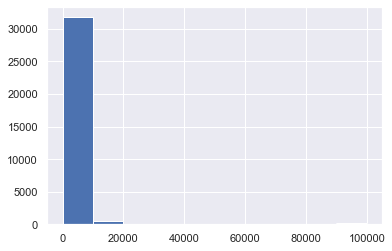

In [165]:
train_data["capital-gain"].hist(bins=10)

### KDE is also great

In [161]:
sns.hist

Object `sns.histplot` not found.


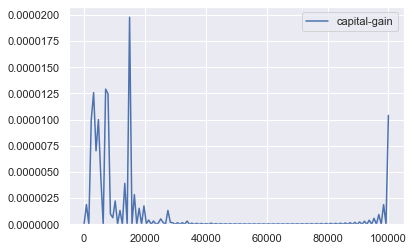

In [164]:
sns.kdeplot(train_data["capital-gain"])

## Box Plot

In [169]:
train_data["capital-gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [170]:
cg = train_data[train_data["capital-gain"]>0]

In [172]:
cg = cg["capital-gain"]

In [173]:
cg

0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
32515     3471
32518    99999
32538    15020
32548     1086
32560    15024
Name: capital-gain, Length: 2712, dtype: int64

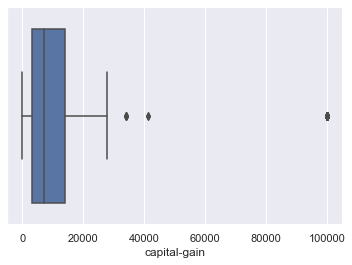

In [174]:
sns.boxplot(cg)

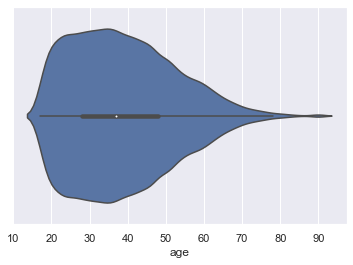

In [129]:
sns.violinplot(train_data.age)

Create multiple histograms:

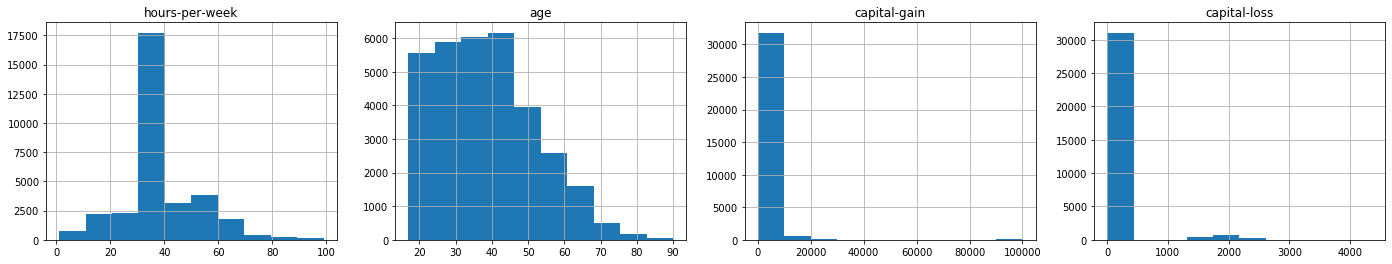

In [10]:
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables),figsize=(24,4))

#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables):
    train_data[var].hist(ax=axes[ind])
    axes[ind].set_title(var)


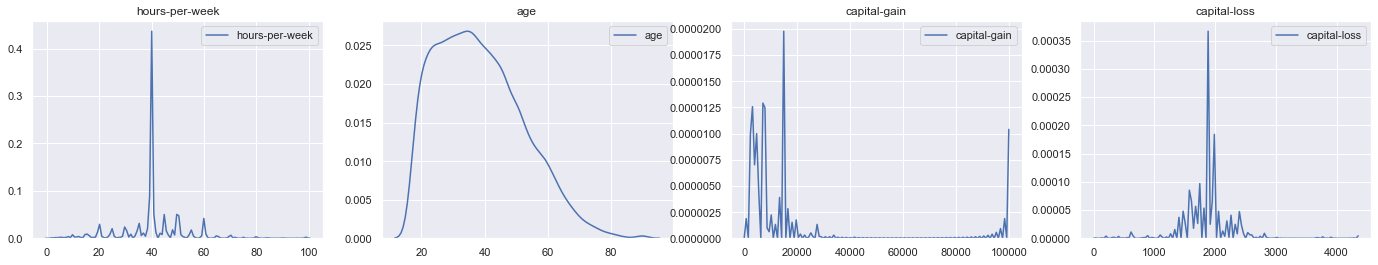

In [113]:

#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables),figsize=(24,4))

#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables):
    sns.kdeplot(train_data[var],ax=axes[ind])
    axes[ind].set_title(var)



### Value Histograms for Categorical Variables (via Pandas and Matplotlib)

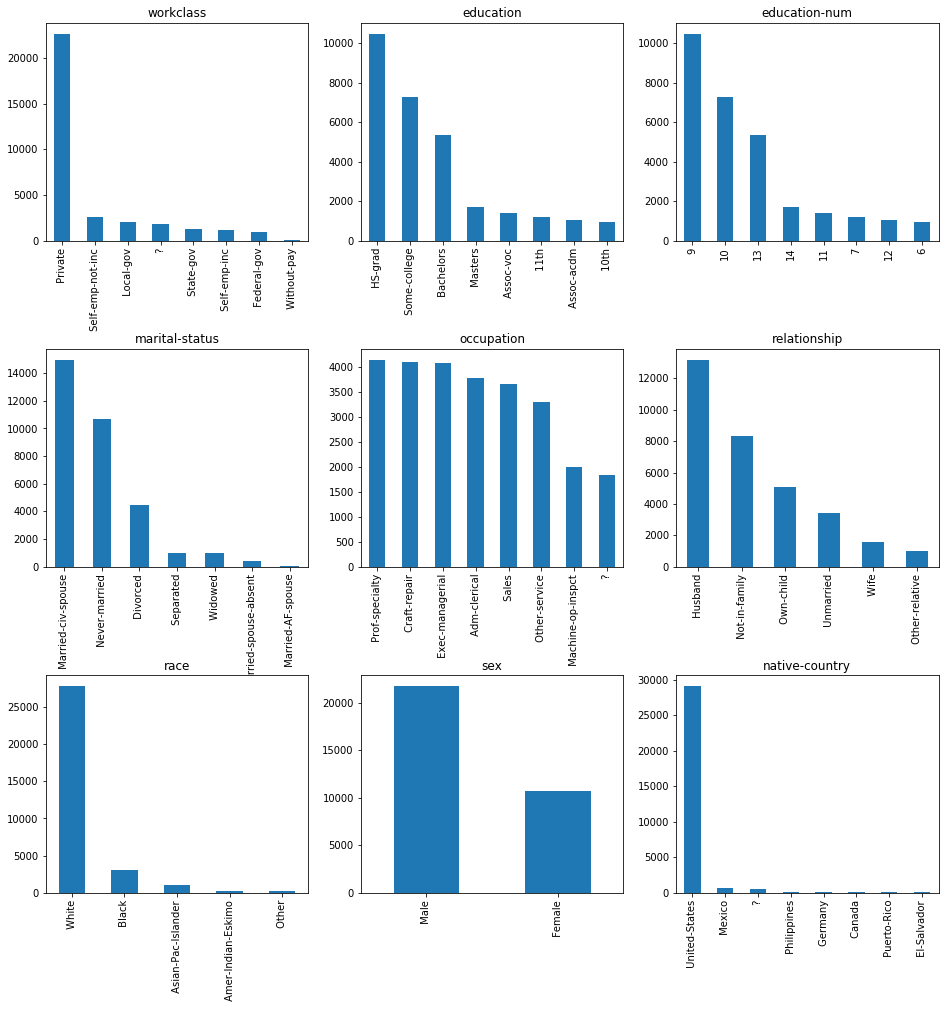

In [11]:
#generate a figures grid:
fig, axes = plt.subplots(3,3,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 3
max_bars = 8

for i,variable in enumerate(categorical_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(train_data[variable].nunique(),max_bars)
    vc = train_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)


### Pie

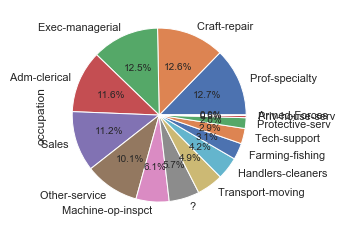

In [179]:
train_data["occupation"].value_counts().plot.pie(autopct="%.1f%%");

## Comparative Visualizations Using Seaborn
We can compare the value distributions for each class

In [12]:
low_income = train_data[train_data['class'] == ' <=50K']
high_income = train_data[train_data['class'] == ' >50K']

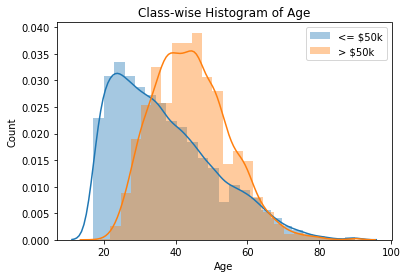

In [13]:
#first we create the figure using Matplotlib
fig,ax=plt.subplots()

#create two histograms using Seaborn:
sns.distplot(low_income.age, bins = 25, kde = True, label = "<= $50k",ax=ax)
sns.distplot(high_income.age, bins = 25, kde = True, label = "> $50k",ax=ax)

#Don't forget to make titles for the figure and axes
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

In [134]:
train_data["class"].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

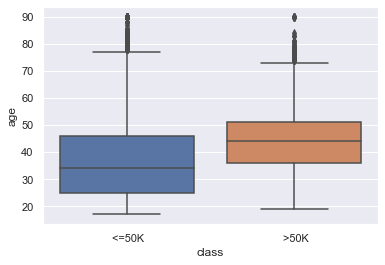

In [183]:
sns.boxplot(x="class",y="age",data=train_data)

Scatter (regression) Plots using Seaborn

In [14]:
var_a = 'education-num'
var_b = 'hours-per-week'

Text(0.5, 0.98, 'Scatter plot of education-num and hours-per-week')

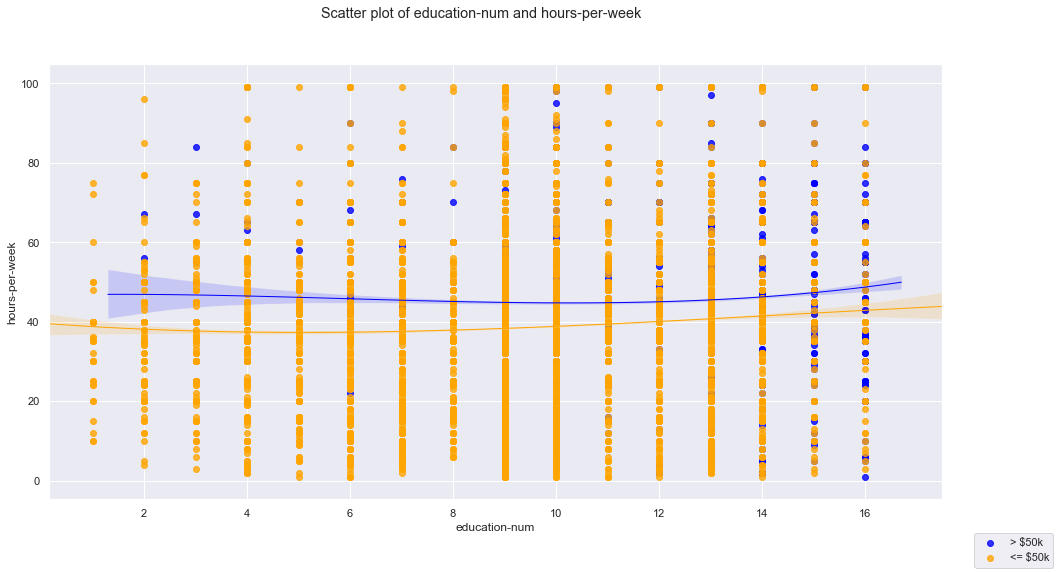

In [15]:
sns.set(color_codes=True)
fig,ax=plt.subplots(figsize=(16,8))
#train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot(var_a, var_b, high_income,ax=ax, 
            scatter_kws={"marker": ".", "color": "blue"},
            line_kws = {"linewidth": "1", "color": "blue"},
            order = 3,
            label = '> $50k')
sns.regplot(var_a, var_b, low_income,ax=ax, 
            scatter_kws={"marker": ".", "color": "orange"},
            line_kws = {"linewidth": "1", "color": "orange"},
            order = 3,
            label = '<= $50k')

fig.legend(loc="lower right")
fig.suptitle(f"Scatter plot of {var_a} and {var_b}")

In [139]:
g=train_data.groupby('workclass')['education-num'].mean()

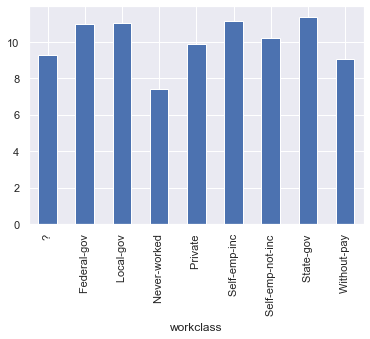

In [184]:
g.plot.bar()

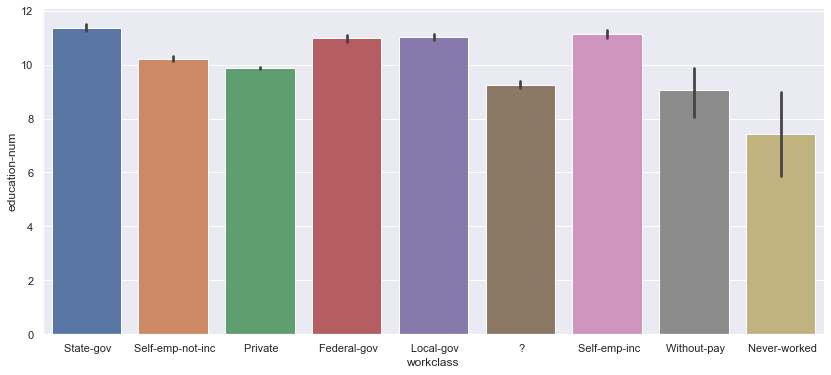

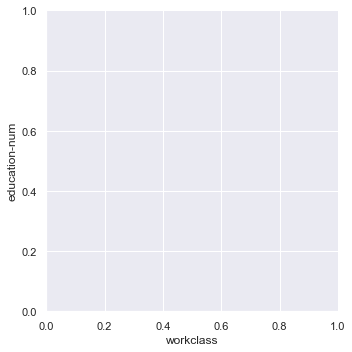

In [185]:
fix, ax = plt.subplots(figsize=(14,6))
sns.catplot(data=train_data,x='workclass',y='education-num',kind='bar',ax=ax)

## Correlations

Computing correlations with Pandas


In [16]:
train_data.corr(method='spearman')

,age,observation-weight,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907
observation-weight,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621
education-num,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215
capital-gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322
capital-loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852
hours-per-week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000


Visualize with a heatmap using Seaborn

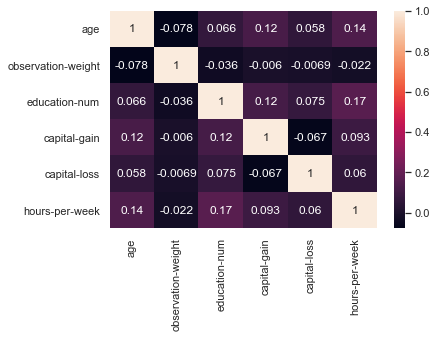

In [17]:
sns.heatmap(train_data.corr(method='spearman'),annot=True)

Feature-class correlation

In [18]:
class_num = train_data["class"].apply(lambda x: 0 if x == ' <=50K' else 1)
class_num.value_counts()

0    24720
1     7841
Name: class, dtype: int64

In [19]:
train_data.corrwith(class_num,method='spearman')

age                   0.272962
observation-weight   -0.010738
education-num         0.329682
capital-gain          0.278159
capital-loss          0.141042
hours-per-week        0.269075
dtype: float64